In [1]:
import sys
from pathlib import Path

root_dir = Path.cwd().parent
if str(root_dir) not in sys.path:
    sys.path.append(str(root_dir))
    
import sys
print("Python executable:", sys.executable)

import sys
print("sys.path:", sys.path, sep="\n")

Python executable: C:\Users\rabhi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe
sys.path:
['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0\\python312.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2288.0_x64__qbz5n2kfra8p0', '', 'C:\\Users\\rabhi\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages', 'C:\\Users\\rabhi\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\win32', 'C:\\Users\\rabhi\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCa

### Data importation

In [2]:
import pandas as pd #type: ignore
from pathlib import Path

data_path = Path("data/BTC_1d.csv")

df = pd.read_csv(data_path, index_col=0, parse_dates=True)
df.head()

,open,high,low,close,volume
timestamp,,,,,
2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844
2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111
2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639
2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574
2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125


---------------------------------------------------------------------------------------------

All available strategies can be found in the package's folder untilted *backtester_framework/strategies*, each one of them in the corresponding module. The *ma_crossver*, *trend_indicator* and *rsi_strategy* are simple strategies that do not need statistical training on historical data to define their trading rules, thus they are constructed by using a decorator programmed in the module *strategy_constructor*. The strategies *LinearTrendStrategies* and *ARIMAStrategy* are inherited from the *Strategy* class since they implement the *fit()* method to find their optimal parameters.

### Moving Average Crossover Strategy usage case

Here is how a strategy is backtested:
- An instance of the wanted strategy is created with the parameters chosen by the user
- An instance of the *Backtester* class is created with the parameters chosen by the user
- The backtest is launched with the *run()* method which takes in argument the strategy instance to backtest and returns an instance of the *Result* class.

In [3]:
from backtester_framework.strategies.moving_average import ma_crossover
from backtester_framework.backtester.backtester import Backtester

strategy_macross = ma_crossover(
                                short_window=20,
                                long_window=50
                                )

backtester = Backtester(
                        data=df,
                        names='BTC',
                        initial_capital=100000,
                        commission=0.01,
                        slippage=0.001,
                        rebalancing_frequency='D'
                        )

result_macross = backtester.run(strategy_macross)

Here the backtester instance takes a dataframe as an input for the data attribute, however the class can also take a path (in the format of a Path type or String type) to the data file location. The file has to be a csv file or a parquet file.

On the one hand the *Result* class offers the possibility to display several charts based on the data generated by the backtested strategy like the evolution of the Net Asset Value (nav), the positions taken over time and the empirical returns distribution.

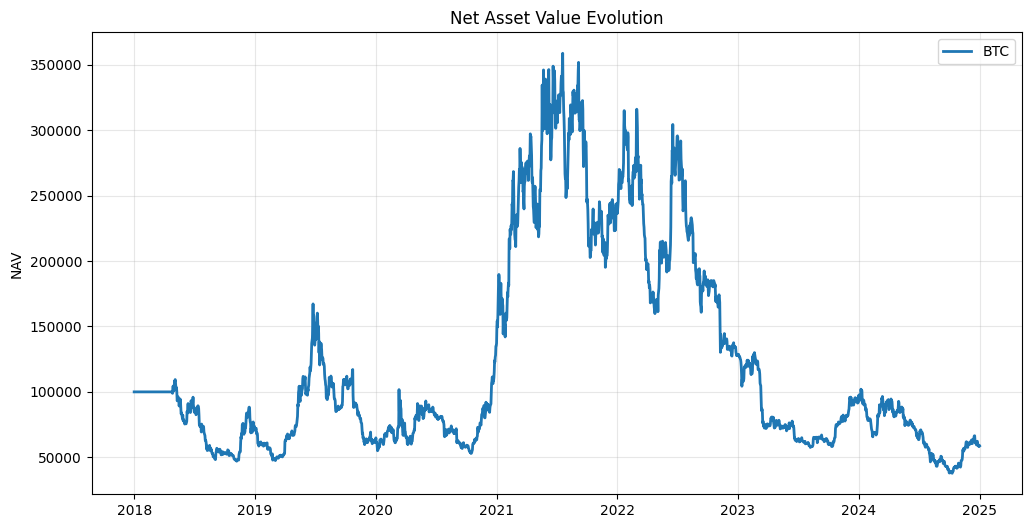

In [4]:
result_macross.plot(what='nav', backend='matplotlib')

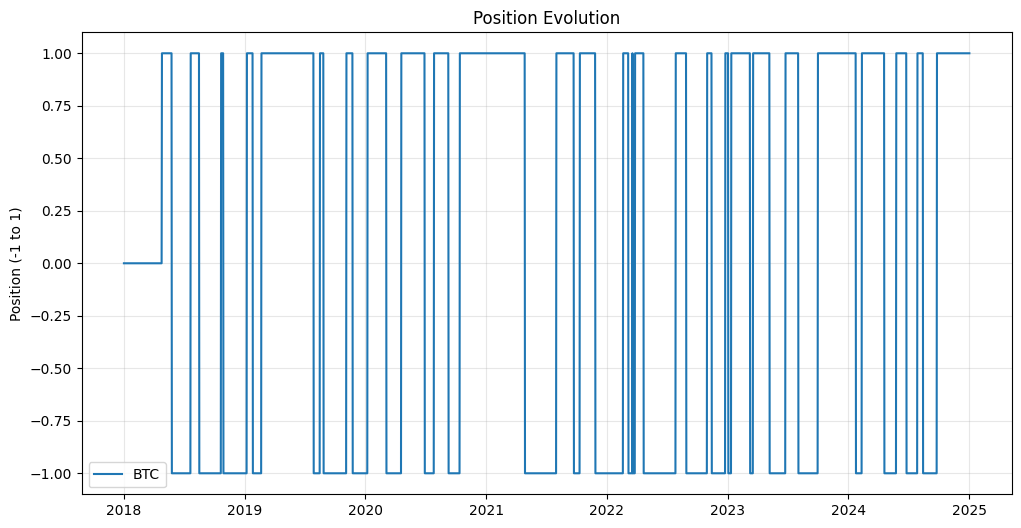

In [5]:
result_macross.plot(what='positions', backend='matplotlib')

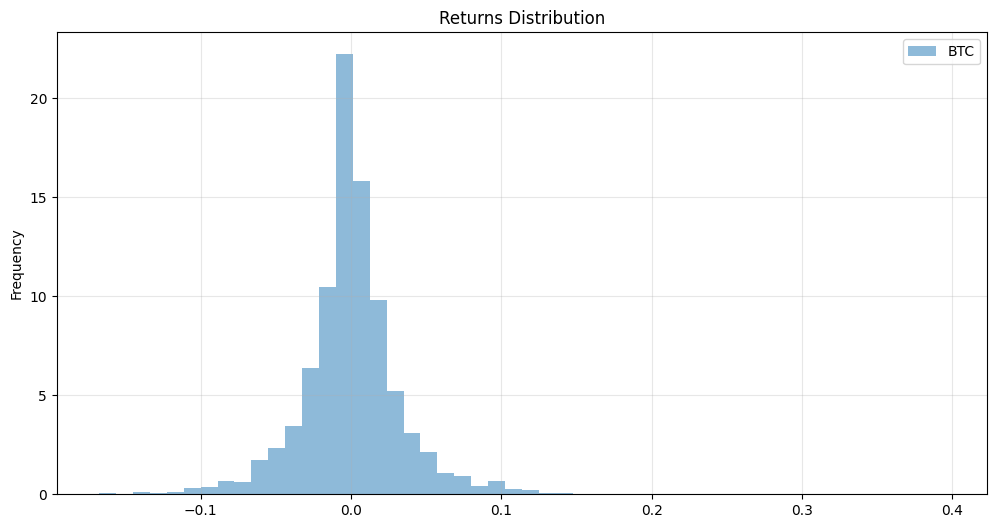

In [6]:
result_macross.plot(what='returns', backend='matplotlib')

On the other hand the *Result* class can compyte the metrics of the backtested strategy by giving to the user the choice between the essential metrics (with the *get_essential_metrics()* method) and all metrics available (with the *get_all_metrics()* method this time). 

In [7]:
dict_essential_metrics_macross = result_macross.get_essential_metrics(asset_name='BTC')
df_essential_metrics_macross = pd.DataFrame([dict_essential_metrics_macross], columns=dict_essential_metrics_macross.keys(), index=['MA Crossover']).T
df_essential_metrics_macross

,MA Crossover
Total Return (%),-41.265161
Annualized Return (%),12.858211
Number of Trades,54.000000
Winning Trades (%),48.148148
Volatility (%),64.329292
Sharpe Ratio,0.199881
Maximum Drawdown (%),-89.479321
Sortino Ratio,0.296706


In [8]:
dict_metrics_macross = result_macross.get_all_metrics(asset_name='BTC')
df_metrics_macross = pd.DataFrame([dict_metrics_macross], columns=dict_metrics_macross.keys(), index=['MA Crossover']).T
df_metrics_macross

,MA Crossover
Total Return (%),-41.265161
Annualized Return (%),12.858211
Number of Trades,54.000000
Winning Trades (%),48.148148
Volatility (%),64.329292
Sharpe Ratio,0.199881
Maximum Drawdown (%),-89.479321
Sortino Ratio,0.296706
CAGR (%),-7.311932
Skewness,0.768050


### RSI Strategy usage case

We can adopt the same approach for the strategy based on the RSI.

In [9]:
from backtester_framework.strategies.RSI import rsi_strategy

strategy_rsi = rsi_strategy(
                            rsi_period=14,
                            overbought=70,
                            oversold=30
                            )

result_rsi  = backtester.run(strategy_rsi)

As we can see below, the *plot()* method of the *Result* class gives also the choice of the chart style to the user between matplotlib, seaborn and plotly.

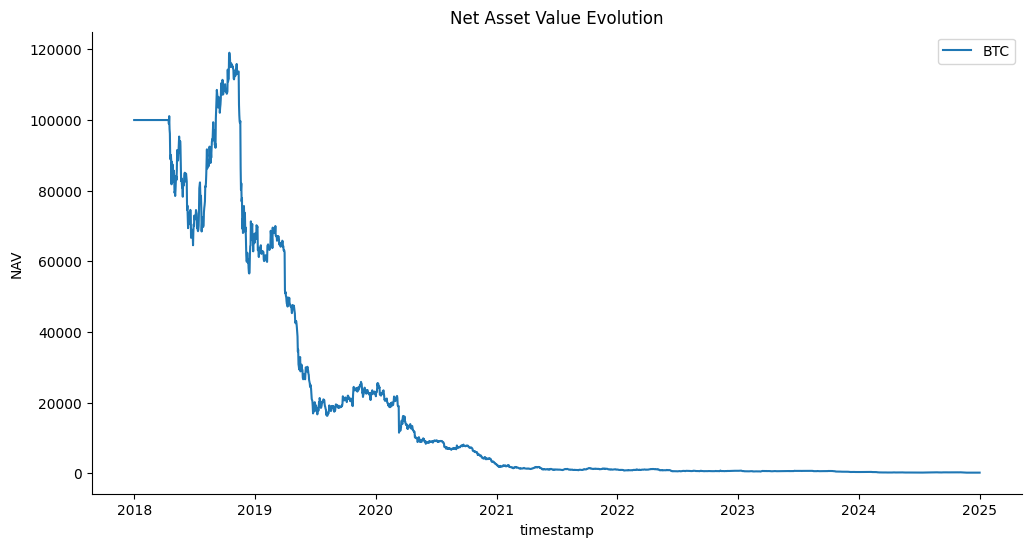

In [10]:
result_rsi.plot(what='nav', backend='seaborn')

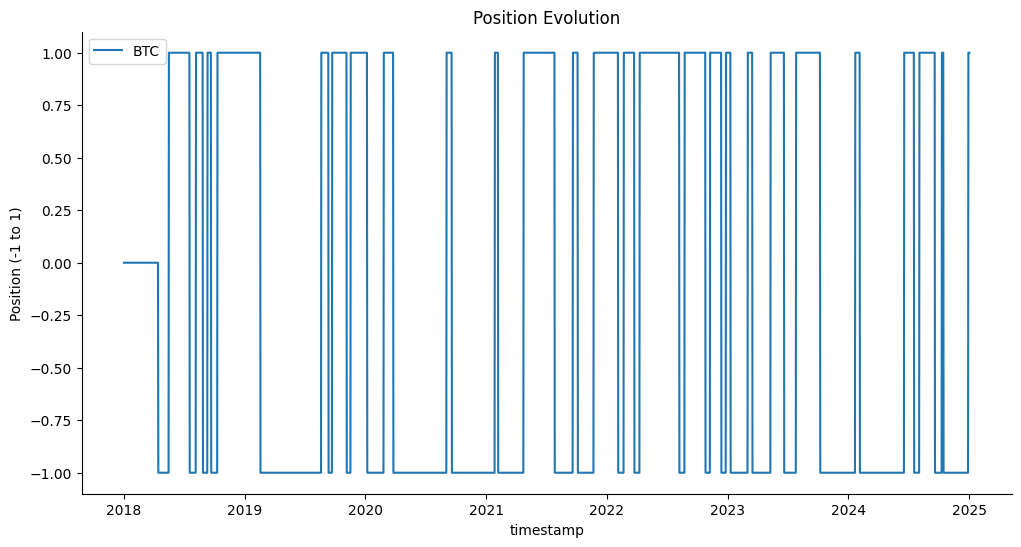

In [11]:
result_rsi.plot(what='positions', backend='seaborn')

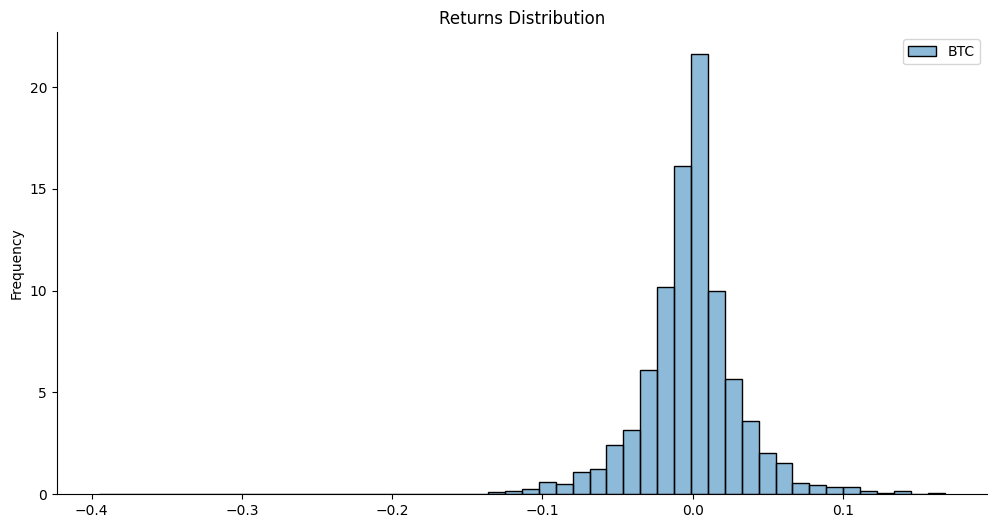

In [12]:
result_rsi.plot(what='returns', backend='seaborn')

In [13]:
dict_essential_metrics_rsi = result_rsi.get_essential_metrics(asset_name='BTC')
df_essential_metrics_rsi = pd.DataFrame([dict_essential_metrics_rsi], columns=dict_essential_metrics_rsi.keys(), index=['Linear Trend']).T
df_essential_metrics_rsi

,Linear Trend
Total Return (%),-99.789521
Annualized Return (%),-66.490274
Number of Trades,53.000000
Winning Trades (%),5.660377
Volatility (%),64.513494
Sharpe Ratio,-1.030641
Maximum Drawdown (%),-99.842475
Sortino Ratio,-1.361621


In [14]:
dict_all_metrics_rsi = result_rsi.get_all_metrics(asset_name='BTC')
df_all_metrics_rsi = pd.DataFrame([dict_all_metrics_rsi], columns=dict_all_metrics_rsi.keys(), index=['Linear Trend']).T
df_all_metrics_rsi

,Linear Trend
Total Return (%),-99.789521
Annualized Return (%),-66.490274
Number of Trades,53.000000
Winning Trades (%),5.660377
Volatility (%),64.513494
Sharpe Ratio,-1.030641
Maximum Drawdown (%),-99.842475
Sortino Ratio,-1.361621
CAGR (%),-58.499840
Skewness,-0.678664


### Linear Trend Strategy usage case

For the more complex strategies like Linear Trend which needs a statiscal training on the historical data the operation stays the same since the training is automatically done when the backtest is launched.

In [15]:
from backtester_framework.strategies.linear_trend import LinearTrendStrategy

strategy_linear_trend = LinearTrendStrategy(
                                        window_size=20,
                                        trend_threshold=0.001
                                        )

result_linear_trend  = backtester.run(strategy_linear_trend)

In [16]:
result_linear_trend.plot(what='nav',backend='plotly')

In [17]:
result_linear_trend.plot(what='positions',backend='plotly')

In [18]:
result_linear_trend.plot(what='returns',backend='plotly')

In [19]:
dict_essential_metrics_linear_trend = result_linear_trend.get_essential_metrics(asset_name='BTC')
df_essential_metrics_linear_trend = pd.DataFrame([dict_essential_metrics_linear_trend], columns=dict_essential_metrics_linear_trend.keys(), index=['Linear Trend']).T
df_essential_metrics_linear_trend

,Linear Trend
Total Return (%),-87.542572
Annualized Return (%),-15.542422
Number of Trades,180.000000
Winning Trades (%),27.777778
Volatility (%),53.509909
Sharpe Ratio,-0.290459
Maximum Drawdown (%),-96.310562
Sortino Ratio,-0.421661


In [20]:
dict_all_metrics_linear_trend = result_linear_trend.get_all_metrics(asset_name='BTC')
df_all_metrics_linear_trend = pd.DataFrame([dict_all_metrics_linear_trend], columns=dict_all_metrics_linear_trend.keys(), index=['Linear Trend']).T
df_all_metrics_linear_trend

,Linear Trend
Total Return (%),-87.542572
Annualized Return (%),-15.542422
Number of Trades,180.000000
Winning Trades (%),27.777778
Volatility (%),53.509909
Sharpe Ratio,-0.290459
Maximum Drawdown (%),-96.310562
Sortino Ratio,-0.421661
CAGR (%),-25.710568
Skewness,0.993613


The *Result* class also offers the possibility to compare the instance's statistics with the ones of other instances.

In [21]:
result_linear_trend.compare_results(result_macross,result_rsi)

,Strategy 1 - BTC,Strategy 2 - BTC,Strategy 3 - BTC
Total Return (%),-87.542572,-41.265161,-99.789521
Annualized Return (%),-15.542422,12.858211,-66.490274
Number of Trades,180.000000,54.000000,53.000000
Winning Trades (%),27.777778,48.148148,5.660377
Volatility (%),53.509909,64.329292,64.513494
Sharpe Ratio,-0.290459,0.199881,-1.030641
Maximum Drawdown (%),-96.310562,-89.479321,-99.842475
Sortino Ratio,-0.421661,0.296706,-1.361621
CAGR (%),-25.710568,-7.311932,-58.499840
Skewness,0.993613,0.768050,-0.678664


### Multi-asset portfolio

The backtesting works also with several data frames and thus apply the backtested strategy on all the asset given in inputs. As mentioned above the backtester can manage the data inputs in the format of a path to a a csv or parquet file.

In [22]:
SOL_path = Path("data/SOL_1d.csv")
XRP_path = Path("data/XRP_1d.csv")

In [23]:
from backtester_framework.strategies.moving_average import trend_indicator


strategy_multi = trend_indicator()

backtester_multi = Backtester(
                            data=[SOL_path, XRP_path],
                            names=['SOL', 'XRP'],
                            initial_capital=100,
                            commission=0.01,
                            slippage=0.001,
                            rebalancing_frequency='D'
                            )

result_macross_multi = backtester_multi.run(strategy_multi)

In general the backtester features is the same, if the user wants to display the nav evolution of an asset he just have to specify its name in the arguments of the *plot()* method or he can display the nav evolution for every backtested assets.

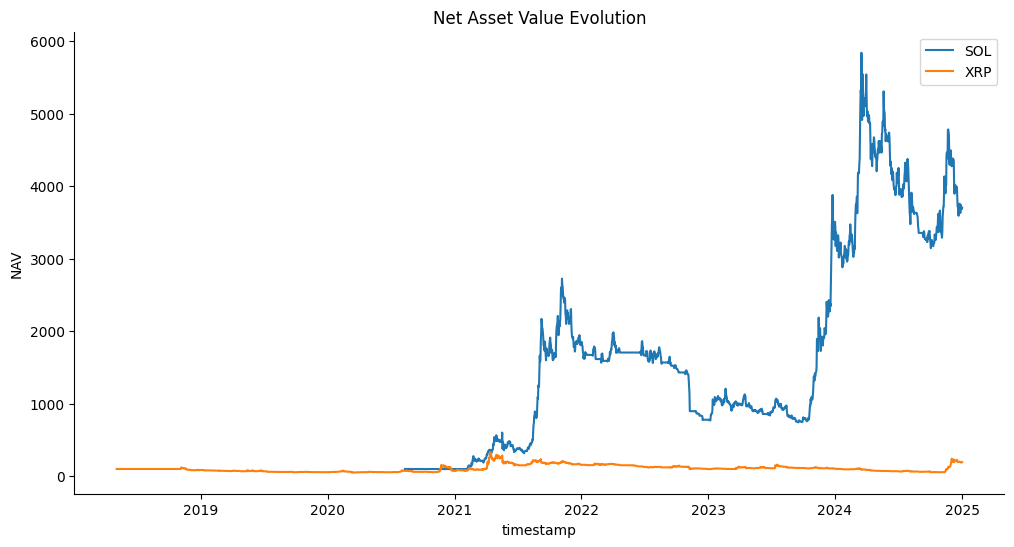

In [24]:
result_macross_multi.plot(what='nav', backend='seaborn')

In [25]:
metrics_SOL = result_macross_multi.get_all_metrics(asset_name='SOL')
metrics_SOL = pd.DataFrame([metrics_SOL], columns=metrics_SOL.keys(), index=['Trend Indicator - SOL']).T

metrics_XRP = result_macross_multi.get_all_metrics(asset_name='XRP')
metrics_XRP = pd.DataFrame([metrics_XRP], columns=metrics_XRP.keys(), index=['Trend Indicator - XRP']).T

metrics_pf = pd.concat([metrics_XRP, metrics_SOL], axis=1)
metrics_pf

,Trend Indicator - XRP,Trend Indicator - SOL
Total Return (%),94.165963,3606.537729
Annualized Return (%),31.368335,110.329258
Number of Trades,240.000000,141.000000
Winning Trades (%),45.833333,48.226950
Volatility (%),67.104386,75.615737
Sharpe Ratio,0.467456,1.459078
Maximum Drawdown (%),-83.572604,-72.747321
Sortino Ratio,0.803153,2.528646
CAGR (%),10.457797,127.408086
Skewness,2.990227,1.081498


In [26]:
from backtester_framework.strategies.moving_average import ma_crossover

strategy_macross_multi2 = ma_crossover(
                                      short_window=20,
                                      long_window=50
                                      )

backtester_multi2 = Backtester(
                            data=[SOL_path, XRP_path],
                            names=['SOL', 'XRP'],
                            initial_capital=100,
                            commission=0.01,
                            slippage=0.001,
                            rebalancing_frequency='D'
                            )

result_macross_multi2 = backtester_multi.run(strategy_macross_multi2)

In [27]:
result_macross_multi.compare_results(result_macross_multi2)

,Strategy 1 - SOL,Strategy 1 - XRP,Strategy 2 - SOL,Strategy 2 - XRP
Total Return (%),3606.537729,94.165963,38.174780,-99.833789
Annualized Return (%),110.329258,31.368335,76.189810,-37.414020
Number of Trades,141.000000,240.000000,29.000000,56.000000
Winning Trades (%),48.226950,45.833333,62.068966,57.142857
Volatility (%),75.615737,67.104386,117.263466,102.255198
Sharpe Ratio,1.459078,0.467456,0.649732,-0.365889
Maximum Drawdown (%),-72.747321,-83.572604,-91.026771,-99.941218
Sortino Ratio,2.528646,0.803153,0.983461,-0.501733
CAGR (%),127.408086,10.457797,7.630539,-61.683622
Skewness,1.081498,2.990227,0.298480,-0.887378


### Unit tests

Different unit tests are performed with *pytest* package et can launched directly from the notebook.

In [28]:
!pytest tests/test_backtester.py -v

============================= test session starts =============================
platform win32 -- Python 3.12.7, pytest-7.4.4, pluggy-1.0.0 -- C:\Users\rabhi\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\rabhi\Documents\Master 272 IEF - Dauphine\M2\S1\Python POO\backtester_trading_strategies_project
plugins: anyio-4.3.0, dash-2.18.2, cov-6.0.0
collecting ... collected 8 items

tests/test_backtester.py::test_backtester_initialization PASSED          [ 12%]
tests/test_backtester.py::test_backtester_with_strategy PASSED           [ 25%]
tests/test_backtester.py::test_backtester_with_multiple_strategies PASSED [ 37%]
tests/test_backtester.py::test_backtester_rebalancing_daily PASSED       [ 50%]
tests/test_backtester.py::test_backtester_rebalancing_intraday FAILED    [ 62%]
tests/test_backtester.py::test_backtester_invalid_frequency PASSED       [ 75%]
tests/test_backtester.py::test_backtester_frequency_validation PASSED    [ 87%]
tests/test_backtester.py::test_backtester_

In [29]:
!pytest tests/test_data_utils.py -v

============================= test session starts =============================
platform win32 -- Python 3.12.7, pytest-7.4.4, pluggy-1.0.0 -- C:\Users\rabhi\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\rabhi\Documents\Master 272 IEF - Dauphine\M2\S1\Python POO\backtester_trading_strategies_project
plugins: anyio-4.3.0, dash-2.18.2, cov-6.0.0
collecting ... collected 5 items

tests/test_data_utils.py::test_data_loading_from_file PASSED             [ 20%]
tests/test_data_utils.py::test_data_validation PASSED                    [ 40%]
tests/test_data_utils.py::test_data_frequency_detection PASSED           [ 60%]
tests/test_data_utils.py::test_data_format_standardization PASSED        [ 80%]
tests/test_data_utils.py::test_multi_asset_data_alignment PASSED         [100%]

============================== 5 passed in 0.05s ==============================


In [30]:
!pytest tests/test_metrics.py -v

============================= test session starts =============================
platform win32 -- Python 3.12.7, pytest-7.4.4, pluggy-1.0.0 -- C:\Users\rabhi\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\rabhi\Documents\Master 272 IEF - Dauphine\M2\S1\Python POO\backtester_trading_strategies_project
plugins: anyio-4.3.0, dash-2.18.2, cov-6.0.0
collecting ... collected 7 items

tests/test_metrics.py::test_annualized_return PASSED                     [ 14%]
tests/test_metrics.py::test_annualized_std PASSED                        [ 28%]
tests/test_metrics.py::test_sharpe_ratio PASSED                          [ 42%]
tests/test_metrics.py::test_sortino_ratio PASSED                         [ 57%]
tests/test_metrics.py::test_max_drawdown PASSED                          [ 71%]
tests/test_metrics.py::test_count_trades PASSED                          [ 85%]
tests/test_metrics.py::test_winning_trades PASSED                        [100%]

============================== 7 passed in

In [31]:
!pytest tests/test_result.py -v

============================= test session starts =============================
platform win32 -- Python 3.12.7, pytest-7.4.4, pluggy-1.0.0 -- C:\Users\rabhi\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\rabhi\Documents\Master 272 IEF - Dauphine\M2\S1\Python POO\backtester_trading_strategies_project
plugins: anyio-4.3.0, dash-2.18.2, cov-6.0.0
collecting ... collected 7 items

tests/test_result.py::test_result_initialization PASSED                  [ 14%]
tests/test_result.py::test_invalid_positions PASSED                      [ 28%]
tests/test_result.py::test_calculate_nav PASSED                          [ 42%]
tests/test_result.py::test_get_metrics_per_asset PASSED                  [ 57%]
tests/test_result.py::test_plotting_multi_asset PASSED                   [ 71%]
tests/test_result.py::test_compare_results_multi_asset PASSED            [ 85%]
tests/test_result.py::test_different_asset_comparison PASSED             [100%]

============================== 7 passed in

In [32]:
!pytest tests/test_strategy.py -v

============================= test session starts =============================
platform win32 -- Python 3.12.7, pytest-7.4.4, pluggy-1.0.0 -- C:\Users\rabhi\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\rabhi\Documents\Master 272 IEF - Dauphine\M2\S1\Python POO\backtester_trading_strategies_project
plugins: anyio-4.3.0, dash-2.18.2, cov-6.0.0
collecting ... collected 7 items

tests/test_strategy.py::test_strategy_decorator PASSED                   [ 14%]
tests/test_strategy.py::test_ma_crossover PASSED                         [ 28%]
tests/test_strategy.py::test_rsi_strategy PASSED                         [ 42%]
tests/test_strategy.py::test_strategy_position_bounds PASSED             [ 57%]
tests/test_strategy.py::test_strategy_parameters PASSED                  [ 71%]
tests/test_strategy.py::test_strategy_with_missing_data PASSED           [ 85%]
tests/test_strategy.py::test_custom_strategy PASSED                      [100%]

============================== 7 passed in

### Dash interface (not functional yet)

Finally, the Dash interface is available to make the backtester use and the strategies comparison easier.

To launch the Dash interface:
- Use the keyboard shortcut *ctrl+shift+ù*
- Enter in the terminal the command python -m backtester_framework.dash_interface.app
- *Ctrl+click* on the http link